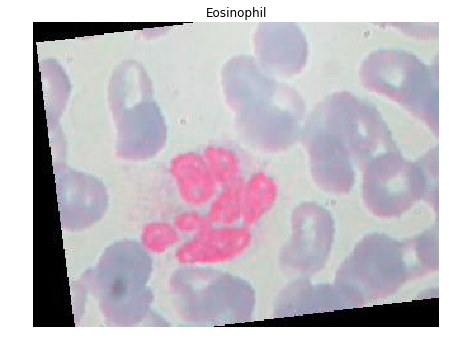

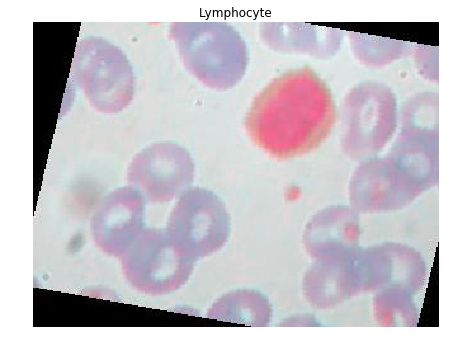

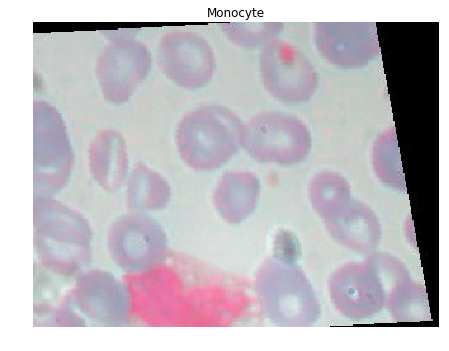

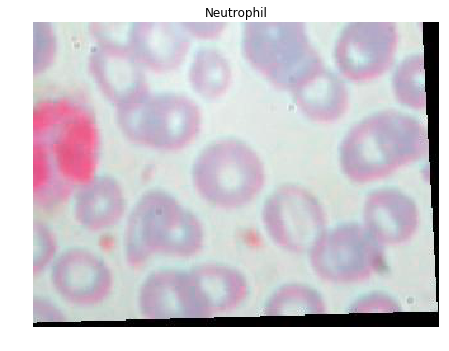

In [1]:
# Plot Image
import matplotlib.pyplot as plt
import cv2

def plotImage(image_location):
    image = cv2.imread(image_name)
    plt.imshow(image)
    plt.show()
    return 

image_name = 'D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_0_207.jpeg'

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.title('Eosinophil')
plt.axis('off') 
plotImage(image_name)


image_name = 'D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_0_204.jpeg'
plt.figure(figsize=(16,16))
plt.subplot(222)
plt.title('Lymphocyte')
plt.axis('off') 
plotImage(image_name)

image_name = 'D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_0_180.jpeg'
plt.figure(figsize=(16,16))
plt.subplot(223)
plt.title('Monocyte')
plt.axis('off') 
plotImage(image_name)


image_name = 'D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL/_0_292.jpeg'
plt.figure(figsize=(16,16))
plt.subplot(224)
plt.title('Neutrophil')
plt.axis('off') 
plotImage(image_name)

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
import glob
import os
folder=os.listdir('D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL')


[  3  88  33  21 207]


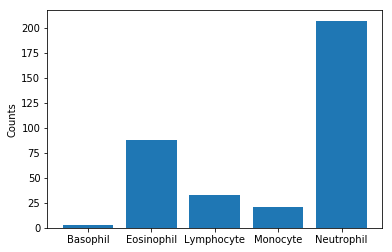

In [ ]:
import csv
from sklearn import preprocessing
reader = csv.reader(open('D:/datasets/blood cells/dataset2-master/dataset2-master/labels.csv'))
# skip the header
next(reader)
X3 = []
y3 = []
for row in reader:
    label = row[2]
    if len(label) > 0 and label.find(',') == -1:
        y3.append(label)
y3 = np.asarray(y3)
encoder = preprocessing.LabelEncoder()
encoder.fit(y3)
encoded_y = encoder.transform(y3)
counts = np.bincount(encoded_y)
print(counts)
fig, ax = plt.subplots()
plt.bar(list(range(5)), counts)
#plt.show()
ax.set_xticklabels(('', 'Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil'))
ax.set_ylabel('Counts')
plt.show()

In [ ]:
from tqdm import tqdm
import scipy
import skimage.transform

def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    z = []
    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL']:
                label = 1
                label2 = 1
            elif wbc_type in ['EOSINOPHIL']:
                label = 2
                label2 = 1
            elif wbc_type in ['MONOCYTE']:
                label = 3  
                label2 = 0
            elif wbc_type in ['LYMPHOCYTE']:
                label = 4 
                label2 = 0
            else:
                label = 5
                label2 = 0
            for image_filename in tqdm(os.listdir(folder + wbc_type)):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(image=img_file, output_shape=(60, 80, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
                    z.append(label2)
    X = np.asarray(X)
    y = np.asarray(y)
    z = np.asarray(z)
    return X,y,z
X_train, y_train, z_train = get_data('D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/')
X_test, y_test, z_test = get_data('D:/datasets/blood cells/dataset2-master/dataset2-master/images/TEST/')

  0%|                                                                                         | 0/2497 [00:00<?, ?it/s]D:\Softwares\anacond33\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
 31%|████████████████████████▏                                                      | 760/2483 [00:14<00:33, 51.80it/s]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


In [ ]:
def onehotencoder(file):
    le = preprocessing.LabelEncoder()
    return (le.fit_transform(file))
    

In [ ]:
onehotencoder(y_train)
onehotencoder(y_test)
onehotencoder(z_train)
onehotencoder(z_test)

In [ ]:
X_train=np.array(X_train)
X_train=X_train/255.0

X_test=np.array(X_test)
X_test=X_test/255.0

In [ ]:
batch_size, height, width, channels = X_train.shape

In [ ]:
import tensorflow as tf

In [ ]:
def neural_net_image_input(image_shape):
   
    return tf.placeholder(tf.float32,shape=[None, image_shape[0],image_shape[1],image_shape[2]],name='x')


def neural_net_label_input(n_classes):
    
    return tf.placeholder(tf.float32,shape=[None, n_classes],name='y')


def neural_net_keep_prob_input():
   
    return tf.placeholder(tf.float32,shape=None,name='keep_prob')

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
   
    #weight=tf.Variable(tf.truncated_normal(conv_ksize))
    weight = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1],\
                                              tf.to_int32(x_tensor.shape[3]),conv_num_outputs], stddev=0.05))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    #conv_layer = tf.nn.conv2d(x_tensor,weight,conv_strides,padding)
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    
    conv_layer = tf.nn.relu(conv_layer)
    
    conv_layer = tf.nn.max_pool(conv_layer, ksize=[1, pool_ksize[0], pool_ksize[1], 1], \
                                strides=[1,pool_strides[0],pool_strides[1],1], padding='SAME')
    
    conv_layer = tf.nn.relu(conv_layer)
    
    return conv_layer

In [ ]:
def flatten(x_tensor):
    
    #reshape=tf.reshape(x_tensor, [Batch Size , Flattened Image Size], name=None)
    return tf.contrib.layers.flatten(x_tensor)

In [ ]:
def fully_conn(x_tensor, num_outputs):
    
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn=tf.nn.relu)


In [ ]:
def output(x_tensor, num_outputs):
    
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn=None)



In [ ]:
def conv_net(x, keep_prob):
    
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    m = conv2d_maxpool(x, 32, (3, 3), (1, 1), (2, 2), (2, 2))
    m = tf.nn.dropout(m, keep_prob)
    
    m = conv2d_maxpool(m, 64, (3, 3), (1, 1), (2, 2), (2, 2))
    m = tf.nn.dropout(m, keep_prob)
    
    m = conv2d_maxpool(m, 128, (3, 3), (1, 1), (2, 2), (2, 2))
    m = tf.nn.dropout(m, keep_prob)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    m = flatten(m)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    m = fully_conn(m, 512)
    m = fully_conn(m, 256)

    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    
    # TODO: return output
    return output(m, 10)

In [ ]:
x = neural_net_image_input((60, 80, 3))
y = neural_net_label_input(5)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [ ]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    
    session.run(optimizer, feed_dict={x:feature_batch, y:label_batch, keep_prob:keep_probability})
        
    pass

In [ ]:

def print_stats(session, feature_batch, label_batch, cost, accuracy):
    
    print (session.run(cost, feed_dict={x:feature_batch, y:label_batch, keep_prob: 1.0}))
    pass

In [ ]:
epochs = 12
batch_size = 128
keep_probability = 0.60

In [ ]:
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        
        train_neural_network(sess, optimizer, keep_probability, X_train, y_train)
        print('Epoch {:>2}, blood cell {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, X_train, y_train, cost, accuracy)